In [1]:
import random
import numpy as np

from qmlab.preprocessing import parse_biomed_data_to_ndarray, reduce_feature_dim
from qmlab.plots.plot_data import plot_2d_data_with_train_test_split
from qmlab.plots.plot_model import plot_decision_boundaries
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn import metrics

In [2]:
seed = 0 
np.random.seed(seed)
random.seed(seed)

In [3]:
X, y = parse_biomed_data_to_ndarray("haberman_new")
X = reduce_feature_dim(X, num_features=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(244, 2)
(62, 2)
(244,)
(62,)


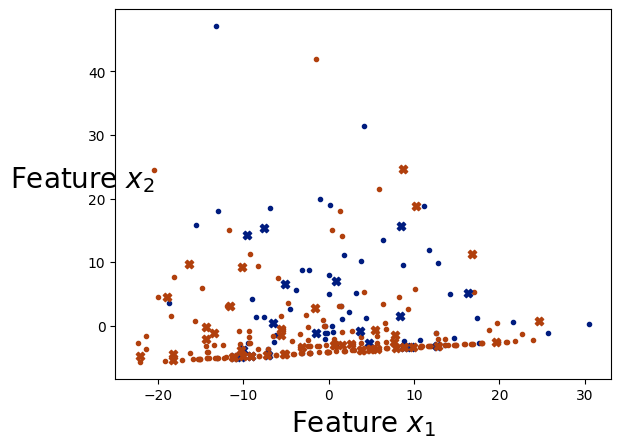

In [4]:
plot_2d_data_with_train_test_split(X_train, y_train, X_test, y_test)

Best grid search parameters: {'C': 100, 'gamma': 0.001}
Best training score: 0.75


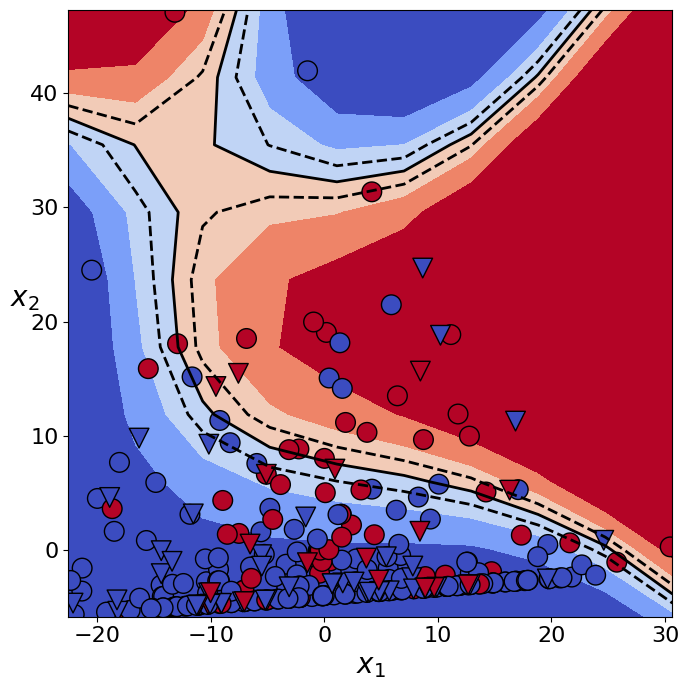

In [5]:
param_grid = {
    "gamma": [0.001, 0.005, 0.01, 0.05, 0.1, 0.25, 0.5, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 5.0, 10.0],
    "C": [1, 2, 4, 6, 8, 10, 100],
}
gs = GridSearchCV(
    estimator=SVC(kernel='rbf', random_state=seed),
    param_grid=param_grid,
    scoring='accuracy',
    n_jobs=4,
    cv=StratifiedKFold(n_splits=2, shuffle=True, random_state=seed),
)
gs.fit(X_train, y_train)

print('Best grid search parameters:', gs.best_params_)
print('Best training score:', gs.best_score_)
clf = gs.best_estimator_

clf.fit(X_train, y_train)

plot_decision_boundaries(clf, X_train, y_train, X_test, y_test)

In [6]:
y_pred = clf.predict(X_train)
training_acc = metrics.balanced_accuracy_score(y_train, y_pred)
y_pred = clf.predict(X_test)
test_acc = metrics.balanced_accuracy_score(y_test, y_pred)
print("Prediction scores: \n")
print("\t\tTrain\tTest")
print(f"Accuracy:\t{training_acc:.2f}\t{test_acc:.2f}")

Prediction scores: 

		Train	Test
Accuracy:	0.63	0.56
